This notebook aims to predict the probability of default payment by credit card client using the data provided. 

### About Dataset


This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)

### Importing Packages

In [1]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')

#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import scipy.stats as stats

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

#Module related to calculation of metrics
from sklearn import metrics

from sklearn.preprocessing import StandardScaler, OneHotEncoder

import statsmodels.formula.api as smf

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

### Importing Dataset

In [2]:
df=pd.read_csv("UCI_Credit_Card.csv")

In [3]:
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [4]:
df.shape

(30000, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

### Exploratory Data Analysis

In [7]:
# Distribution of defaults
df=df.rename(columns={'default.payment.next.month':'Fraud'})
df.Fraud.value_counts()

0    23364
1     6636
Name: Fraud, dtype: int64

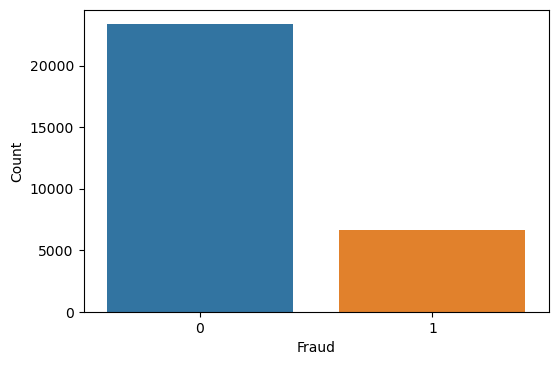

In [8]:
plt.figure(dpi=100)
sns.countplot(x="Fraud", data=df)
plt.xlabel("Fraud")
plt.ylabel("Count")
plt.show()

In [9]:
df2=df.copy()

In [10]:
def sex1(x):
    if (x==1):
        return "Male"
    else:
        return "Female"
df2['SEX']=df['SEX'].apply(sex1)

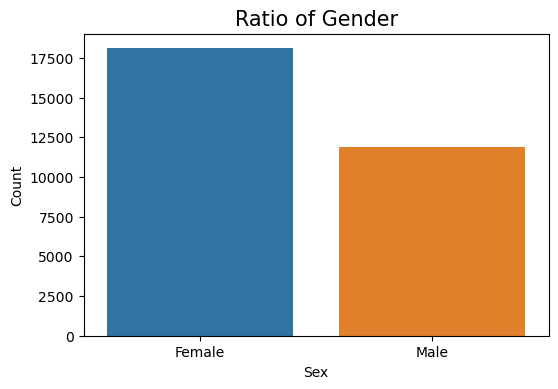

In [11]:
plt.figure(dpi=100)
df2.SEX.value_counts()
sns.countplot(x="SEX", data=df2)
plt.title("Ratio of Gender", size=15)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

In [12]:
df2.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [13]:
def edu(x):
    if (x==0) or (x==5) or (x==6):
        x=4
    return x
df['EDUCATION']=df['EDUCATION'].apply(edu)
df2['EDUCATION']=df2['EDUCATION'].apply(edu)

In [14]:
def edu1(x):
    if (x==1):
        return "Graduate school"
    elif (x==2):
        return "University"
    elif (x==3):
        return "High School"
    else:
        return "Others"
df2['EDUCATION']=df2['EDUCATION'].apply(edu1)

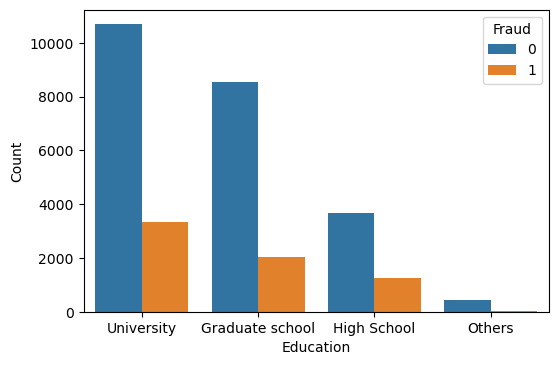

In [16]:
plt.figure(dpi=100)
df2.EDUCATION.value_counts()
sns.countplot(x="EDUCATION", hue="Fraud", data=df2)
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

In [17]:
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [18]:
def marriage(x):
    if (x==0):
        x=3
    return x
df['MARRIAGE']=df['MARRIAGE'].apply(marriage)
df2['MARRIAGE']=df2['MARRIAGE'].apply(marriage)

In [19]:
def marriage1(x):
    if (x==1):
        return "Married"
    elif (x==2):
        return "Single"
    else:
        return "Others"
df2['MARRIAGE']=df2['MARRIAGE'].apply(marriage1)

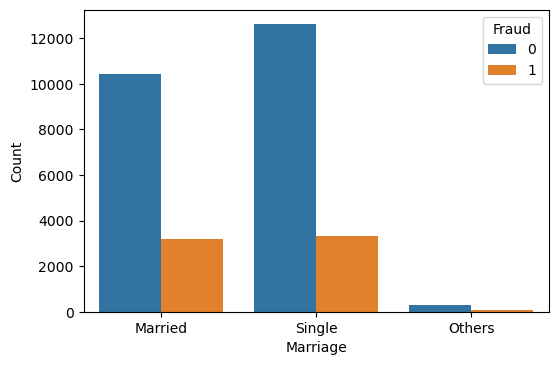

In [21]:
plt.figure(dpi=100)
df2.MARRIAGE.value_counts()
sns.countplot(x="MARRIAGE", hue="Fraud", data=df2)
plt.xlabel("Marriage")
plt.ylabel("Count")
plt.show()

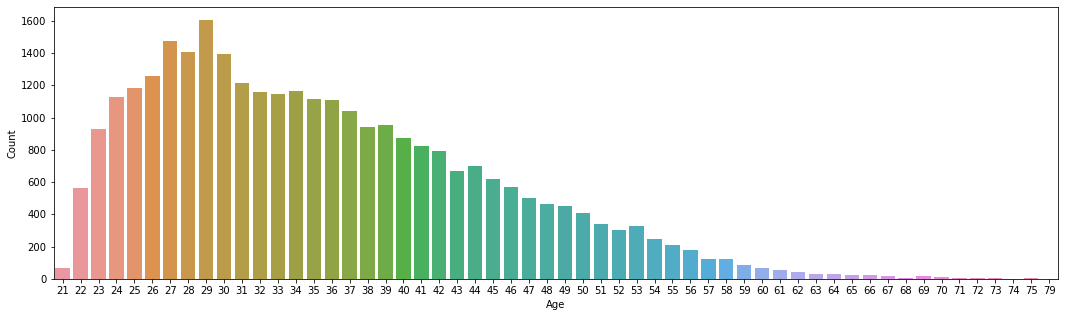

In [22]:
plt.figure(figsize=(18,5))
age=df2['AGE'].value_counts().reset_index()
sns.barplot(x='index',y='AGE',data=age,orient='v')
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [23]:
# Dropping unnecessary column
df.drop(['ID'], axis=1, inplace=True)

In [24]:
#Handling Outlier
def outlier_capping(x):
    x=x.clip(upper=x.quantile(0.99))
    x=x.clip(lower=x.quantile(0.01))
    return x
df=df.apply(outlier_capping)

In [25]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Fraud
0,20000.0,2,2,1,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.00,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.00,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.00,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.00,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.00,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.00,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.00,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37.0,3.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.00,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41.0,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,66522.18,3409.0,1178.0,1926.0,52964.0,1804.0,1


### Feature Engineering

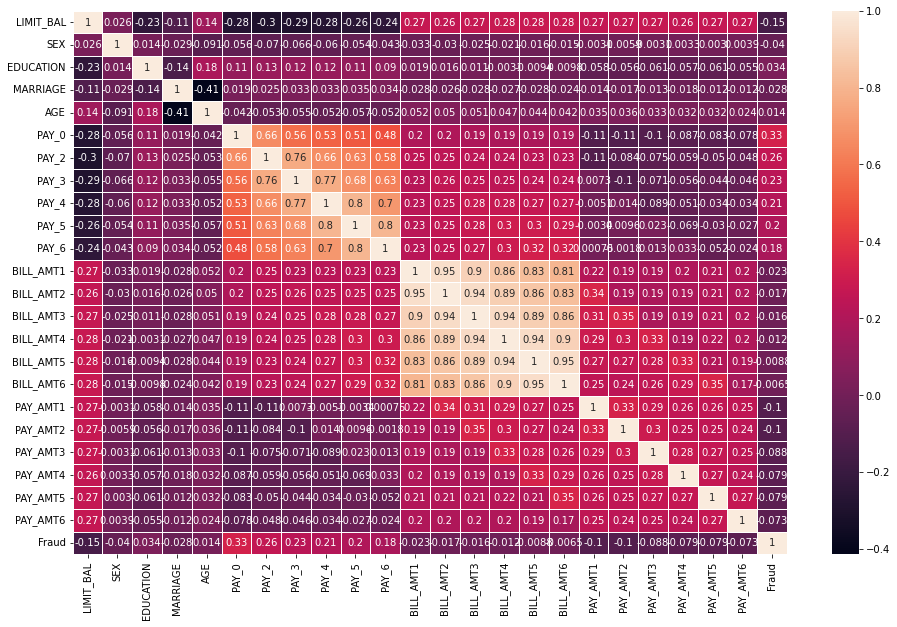

In [26]:
plt.figure (figsize= (16,10))
sns.heatmap(df.corr(),linewidths=.5,annot=True)
plt.show()

In [27]:
# One-hot encoding
df1=df.copy()
df1 = pd.get_dummies(df1, columns=["SEX"])
df1 = pd.get_dummies(df1, columns=["EDUCATION"])
df1 = pd.get_dummies(df1, columns=["MARRIAGE"])

In [28]:
df1

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,Fraud,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,...,1,0,1,0,1,0,0,1,0,0
1,120000.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,...,1,0,1,0,1,0,0,0,1,0
2,90000.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,...,0,0,1,0,1,0,0,0,1,0
3,50000.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,...,0,0,1,0,1,0,0,1,0,0
4,50000.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,192815.0,...,0,1,0,0,0,1,0,1,0,0
29996,150000.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.0,1828.0,...,0,1,0,0,0,1,0,0,1,0
29997,30000.0,37.0,3.0,3.0,2.0,-1.0,0.0,0.0,3565.0,3356.0,...,1,1,0,0,1,0,0,0,1,0
29998,80000.0,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,-81.0,78379.0,...,1,1,0,0,0,1,0,1,0,0


### Splitting the data into train & test

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_test, y_pred):
    print("Accuracy Score: ", accuracy_score(y_test, y_pred))
    print("Precision Score: ", precision_score(y_test, y_pred))
    print("Recall Score: ", recall_score(y_test, y_pred))
    print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
    print("F1 Score: ", f1_score(y_test,y_pred))
    
    df = {'y_Actual': y_test, 'y_Predicted': y_pred}

    df1 = pd.DataFrame(df, columns = ['y_Actual','y_Predicted'])

    clf_confusion_matrix = pd.crosstab(df['y_Predicted'], df['y_Actual'], rownames = ['Predicted'], colnames=['Actual'])

    sns.heatmap(clf_confusion_matrix, annot=True)
    plt.savefig('conf1.png')

In [34]:
target = df1.Fraud
features = df1.drop('Fraud', axis=1)
data_final = pd.concat([features, target], axis=1)

In [35]:
#Splitting the data for sklearn methods
train_y, test_y, train_X, test_X = train_test_split(target,features, test_size=0.3, random_state=123)

In [36]:
target.head()

0    1
1    1
2    0
3    0
4    0
Name: Fraud, dtype: int64

### Logistic Regression

Accuracy Score:  0.7838888888888889
Precision Score:  0.8
Recall Score:  0.002053388090349076
Confusion Matrix:  [[7051    1]
 [1944    4]]
F1 Score:  0.00409626216077829


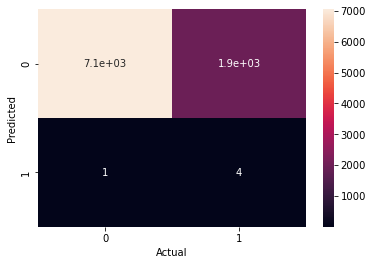

In [37]:
#accuracy={}
model = LogisticRegression()
model.fit(train_X, train_y)

#train_pred = model.predict(train_X)
test_pred = model.predict(test_X)

#print(classification_report(train_pred, train_y))
#print('\nAccuracy Score for model1(training): ', accuracy_score(train_pred, train_y))

#print(classification_report(test_pred, test_y))
#print('\nAccuracy Score for model1(testing): ', accuracy_score(test_pred, test_y))

evaluate_model(test_y, test_pred)

### KNN

In [38]:
#Standardization of data
sc = StandardScaler()
std_data = sc.fit_transform(train_X)

In [39]:
std_data_train = pd.DataFrame(std_data, columns=train_X.columns, index = train_X.index )
std_data_test = pd.DataFrame(sc.transform(test_X), columns=test_X.columns, index = test_X.index )

In [40]:
#Using GridsearchCV with standrardized data
param_grid = {'n_neighbors':[3,4,5,6,7,8,9,10,11,12],
              'weights': ['uniform', 'distance']}
model = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, cv=5, scoring = 'f1_weighted')
model = model.fit(std_data_train, train_y)

In [41]:
model.best_score_

0.7801456177979154

In [42]:
model.best_params_

{'n_neighbors': 10, 'weights': 'distance'}

In [43]:
train_pred2 = model.predict(std_data_train)
test_pred2 = model.predict(std_data_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16312
           1       1.00      1.00      1.00      4688

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000


Accuracy Score for model2(training):  0.9992857142857143
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      7052
           1       0.59      0.33      0.42      1948

    accuracy                           0.80      9000
   macro avg       0.71      0.63      0.65      9000
weighted avg       0.78      0.80      0.78      9000


Accuracy Score for model2(testing):  0.8042222222222222
Accuracy Score:  0.8042222222222222
Precision Score:  0.5857933579335793
Recall Score:  0.3259753593429158
Confusion Matrix:  [[6603  449]
 [1313  635]]
F1 Score:  0.41886543535620047


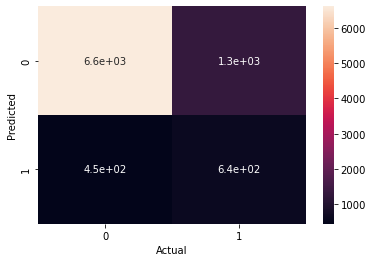

In [44]:
print(metrics.classification_report(train_y, train_pred2))
print('\nAccuracy Score for model2(training): ', accuracy_score(train_pred2, train_y))

print(metrics.classification_report(test_y, test_pred2))
print('\nAccuracy Score for model2(testing): ', accuracy_score(test_pred2, test_y))

evaluate_model(test_y, test_pred2)

### Decision Tree

In [45]:
param_grid = {'max_depth': np.arange(3, 5),
             'max_features': np.arange(3,5)}

In [46]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
tree.fit( train_X, train_y )

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([3, 4]),
                         'max_features': array([3, 4])})

In [47]:
tree.best_score_

0.8075714285714286

In [48]:
tree.best_params_

{'max_depth': 3, 'max_features': 4}

In [49]:
clf_tree = DecisionTreeClassifier( max_depth = 3, max_features=4, criterion='gini' )
train_X = train_X[train_X.columns.difference(['pred_prob'])]
test_X = test_X[test_X.columns.difference(['pred_prob'])]
clf_tree.fit( train_X, train_y )

DecisionTreeClassifier(max_depth=3, max_features=4)

In [50]:
train_pred1 = clf_tree.predict(train_X)
test_pred1 = clf_tree.predict(test_X)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88     16312
           1       0.64      0.28      0.39      4688

    accuracy                           0.80     21000
   macro avg       0.73      0.62      0.63     21000
weighted avg       0.78      0.80      0.77     21000


Accuracy Score for model3(training):  0.8035238095238095
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7052
           1       0.59      0.27      0.37      1948

    accuracy                           0.80      9000
   macro avg       0.71      0.61      0.63      9000
weighted avg       0.77      0.80      0.77      9000


Accuracy Score for model3(testing):  0.8016666666666666
Accuracy Score:  0.8016666666666666
Precision Score:  0.5912653975363942
Recall Score:  0.27104722792607805
Confusion Matrix:  [[6687  365]
 [1420  528]]
F1 Score:  0.371700105596621


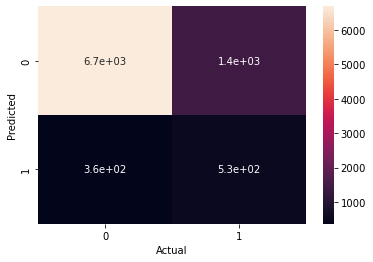

In [51]:
print(metrics.classification_report(train_y, train_pred1))
print('\nAccuracy Score for model3(training): ', accuracy_score(train_pred1, train_y))

print(metrics.classification_report(test_y, test_pred1))
print('\nAccuracy Score for model3(testing): ', accuracy_score(test_pred1, test_y))
evaluate_model(test_y, test_pred1)

### Naive Bayes

In [52]:
nb_clf = GaussianNB()
nb_clf.fit(train_X, train_y)

GaussianNB()

In [53]:
train_pred4=nb_clf.predict(train_X)
test_pred4=nb_clf.predict(test_X)

              precision    recall  f1-score   support

           0       0.86      0.35      0.49     16312
           1       0.26      0.80      0.39      4688

    accuracy                           0.45     21000
   macro avg       0.56      0.58      0.44     21000
weighted avg       0.73      0.45      0.47     21000


Accuracy Score for model4(training):  0.4481904761904762
              precision    recall  f1-score   support

           0       0.87      0.35      0.50      7052
           1       0.26      0.81      0.39      1948

    accuracy                           0.45      9000
   macro avg       0.56      0.58      0.44      9000
weighted avg       0.74      0.45      0.47      9000


Accuracy Score for model4(testing):  0.4481904761904762
Accuracy Score:  0.44755555555555554
Precision Score:  0.25533980582524274
Recall Score:  0.8100616016427105
Confusion Matrix:  [[2450 4602]
 [ 370 1578]]
F1 Score:  0.3882874015748032


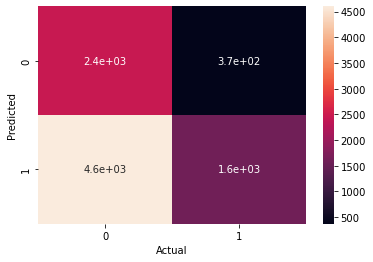

In [54]:
print(metrics.classification_report(train_y, train_pred4))
print('\nAccuracy Score for model4(training): ', accuracy_score(train_pred4, train_y))

print(metrics.classification_report(test_y, test_pred4))
print('\nAccuracy Score for model4(testing): ', accuracy_score(train_pred4, train_y))
evaluate_model(test_y, test_pred4)

### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

radm_clf = RandomForestClassifier(oob_score=True,n_estimators=100 , max_depth = 10, max_features=4, n_jobs=-1)
radm_clf.fit( train_X, train_y )

RandomForestClassifier(max_depth=10, max_features=4, n_jobs=-1, oob_score=True)

In [56]:
train_pred5=radm_clf.predict(train_X)
test_pred5=radm_clf.predict(test_X)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     16312
           1       0.85      0.46      0.59      4688

    accuracy                           0.86     21000
   macro avg       0.86      0.72      0.75     21000
weighted avg       0.86      0.86      0.84     21000


Accuracy Score for model5(training):  0.8606190476190476
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7052
           1       0.66      0.36      0.47      1948

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000


Accuracy Score for model5(testing):  0.8208888888888889
Accuracy Score:  0.8208888888888889
Precision Score:  0.6558441558441559
Recall Score:  0.3629363449691992
Confusion Matrix:  [[6681  371]
 [1241  707]]
F1 Score:  0.4672835426305354


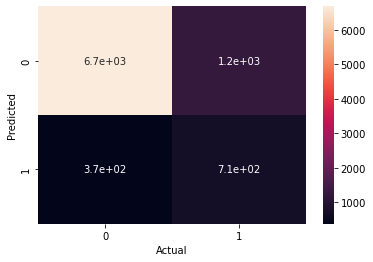

In [57]:
print(metrics.classification_report(train_y, train_pred5))
print('\nAccuracy Score for model5(training): ', accuracy_score(train_pred5, train_y))

print(metrics.classification_report(test_y, test_pred5))
print('\nAccuracy Score for model5(testing): ', accuracy_score(test_pred5, test_y))
evaluate_model(test_y, test_pred5)

In [49]:
lr=accuracy_score(test_pred, test_y)*100
knn=accuracy_score(test_pred2, test_y)*100
dt=accuracy_score(test_pred1, test_y)*100
rf=accuracy_score(test_pred5, test_y)*100
nb=accuracy_score(test_pred4, test_y)*100

lr1=accuracy_score(train_pred, train_y)*100
knn1=accuracy_score(train_pred2, train_y)*100
dt1=accuracy_score(train_pred1, train_y)*100
rf1=accuracy_score(train_pred5, train_y)*100
nb1=accuracy_score(train_pred4, train_y)*100

In [50]:
dict_train={"Logistic Regression":lr1, "KNN":knn1, "Decision Tree":dt1, "Random Forest":rf1, "Naive Bayes":nb1}
dict_test={"Logistic Regression":lr, "KNN":knn, "Decision Tree":dt, "Random Forest":rf, "Naive Bayes":nb}

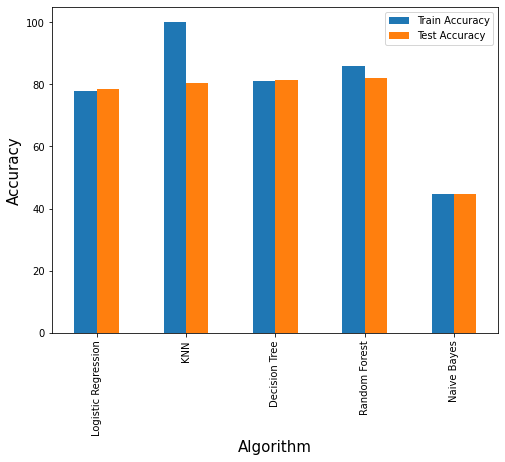

In [51]:
plot1=pd.DataFrame([dict_train,dict_test], index=['Train Accuracy','Test Accuracy']).transpose()

plot1.plot(kind='bar',figsize=(8,6))
plt.xlabel("Algorithm",fontsize=15)
plt.ylabel("Accuracy",fontsize=15)
plt.show()

In [58]:
!pip install scikit-plot

  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
